In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_manager import FeatureManager
from dnn_classifier import DNNModel

In [ ]:

data = pd.read_csv("BTCUSDT-1d.csv", parse_dates=["Open Time"], index_col = "Open Time")
fm = FeatureManager()
fm.build_feature(data)


======= Lap 1 =======
Train = 1266, Val = 271, Test = 272, All = 1809


2023-01-08 23:52:25.479821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 23:52:25.485856: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.70746, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7379 - accuracy: 0.5229 - val_loss: 0.7075 - val_accuracy: 0.5166 - 2s/epoch - 49ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.70746 to 0.69910, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7530 - accuracy: 0.4874 - val_loss: 0.6991 - val_accuracy: 0.5166 - 473ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.69910 to 0.69287, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7331 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.5240 - 466ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.69287 to 0.69092, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7219 - accuracy: 0.5284 - val_loss: 0.6909 - val_accuracy: 0.5166 - 491ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.69092 to 0.68879, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7131 - accuracy: 0.5363 - val_loss

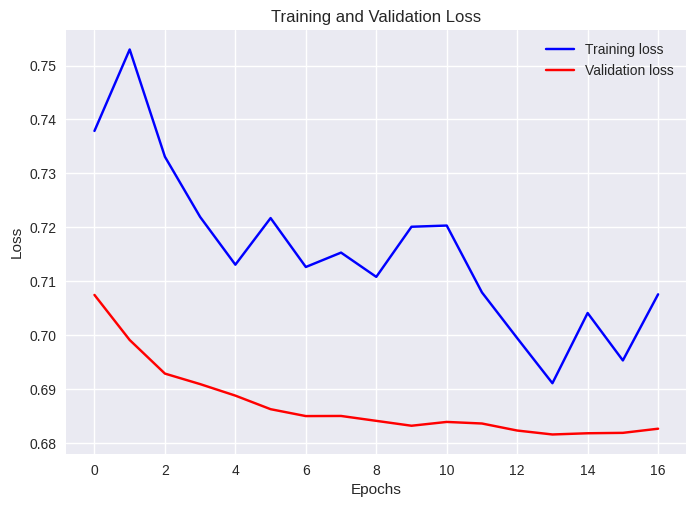

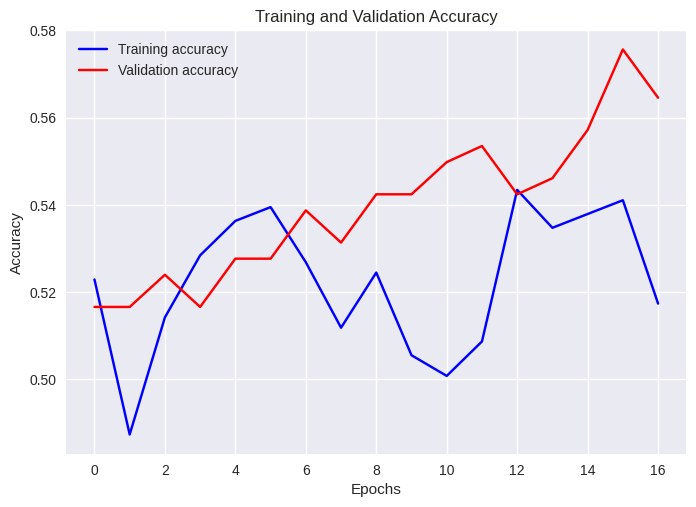


======= Lap 2 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69408, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7315 - accuracy: 0.5237 - val_loss: 0.6941 - val_accuracy: 0.5277 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69408 to 0.68720, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7355 - accuracy: 0.4953 - val_loss: 0.6872 - val_accuracy: 0.5461 - 559ms/epoch - 14ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68720 to 0.68330, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7160 - accuracy: 0.5229 - val_loss: 0.6833 - val_accuracy: 0.5424 - 485ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68330
40/40 - 0s - loss: 0.7069 - accuracy: 0.5221 - val_loss: 0.6834 - val_accuracy: 0.5424 - 395ms/epoch - 10ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68330 to 0.68203, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.6993

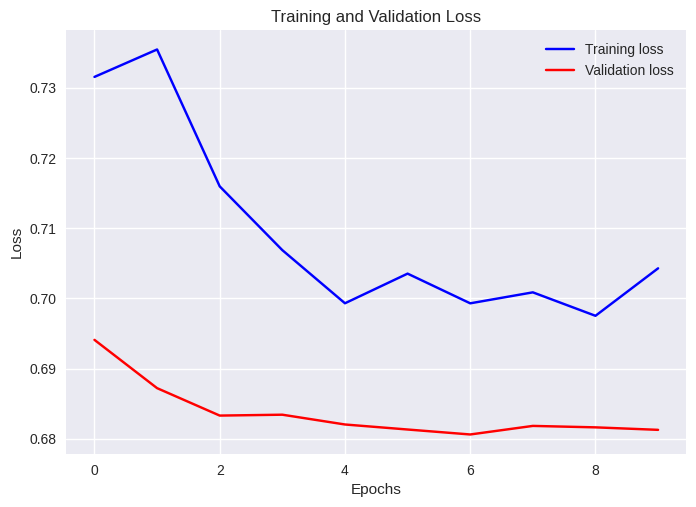

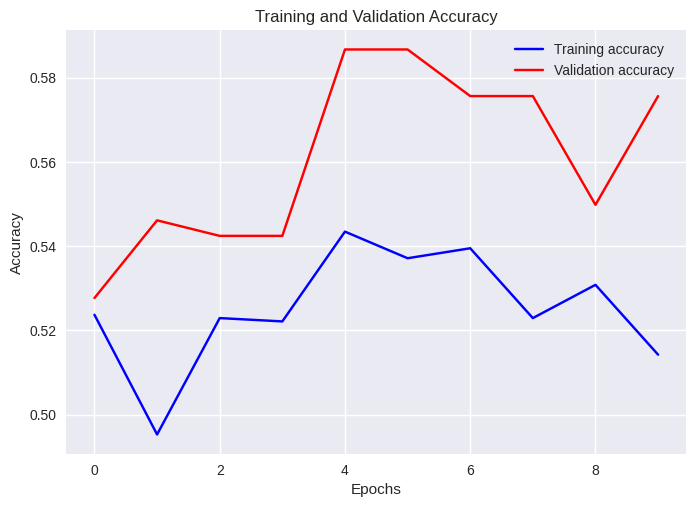


======= Lap 3 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69355, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7310 - accuracy: 0.5229 - val_loss: 0.6935 - val_accuracy: 0.5240 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69355 to 0.68653, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7331 - accuracy: 0.4905 - val_loss: 0.6865 - val_accuracy: 0.5424 - 498ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68653 to 0.68274, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7132 - accuracy: 0.5253 - val_loss: 0.6827 - val_accuracy: 0.5535 - 453ms/epoch - 11ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68274
40/40 - 0s - loss: 0.7054 - accuracy: 0.5205 - val_loss: 0.6832 - val_accuracy: 0.5572 - 474ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68274 to 0.68203, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.6986

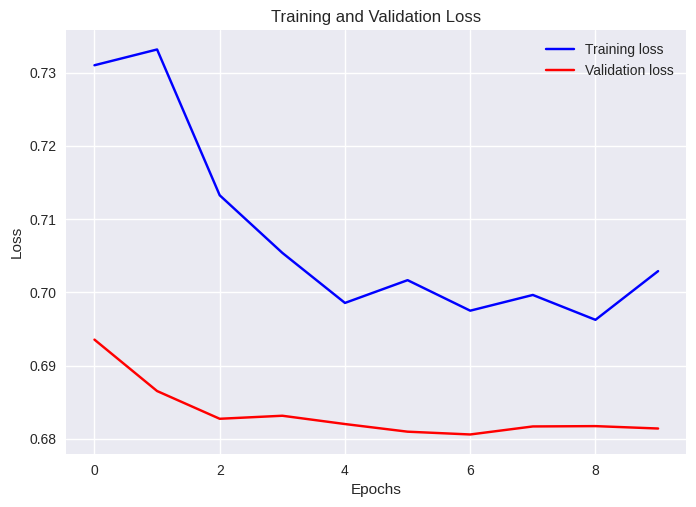

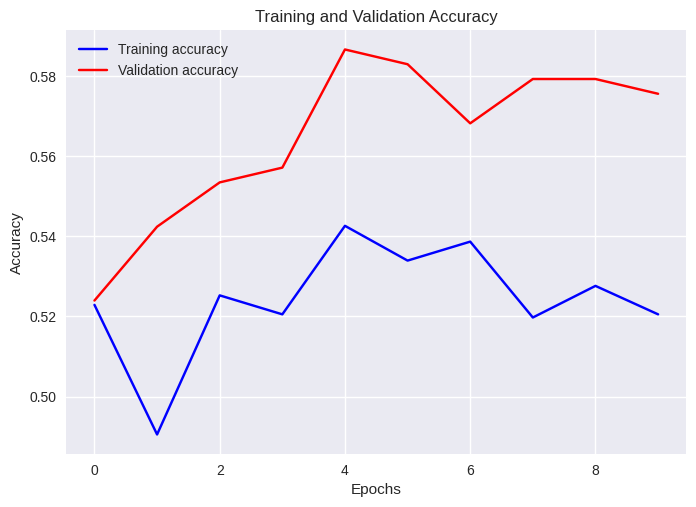


======= Lap 4 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69328, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7309 - accuracy: 0.5182 - val_loss: 0.6933 - val_accuracy: 0.5277 - 2s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69328 to 0.68535, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7322 - accuracy: 0.4929 - val_loss: 0.6854 - val_accuracy: 0.5424 - 433ms/epoch - 11ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68535 to 0.68246, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7118 - accuracy: 0.5261 - val_loss: 0.6825 - val_accuracy: 0.5572 - 556ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68246
40/40 - 0s - loss: 0.7043 - accuracy: 0.5229 - val_loss: 0.6830 - val_accuracy: 0.5461 - 455ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68246 to 0.68199, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.6967

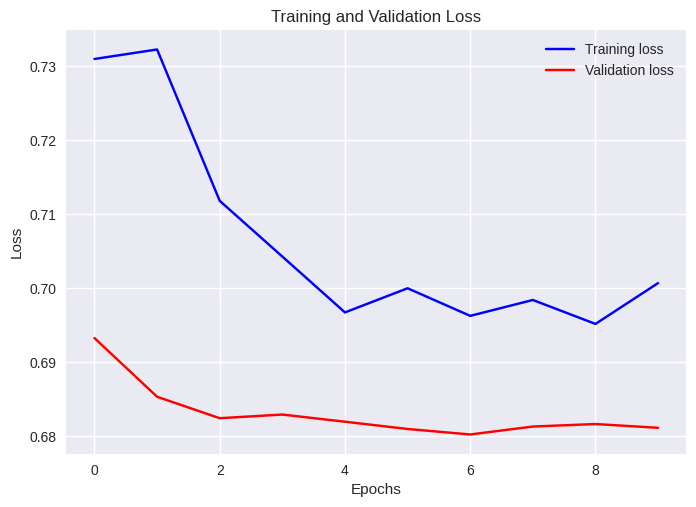

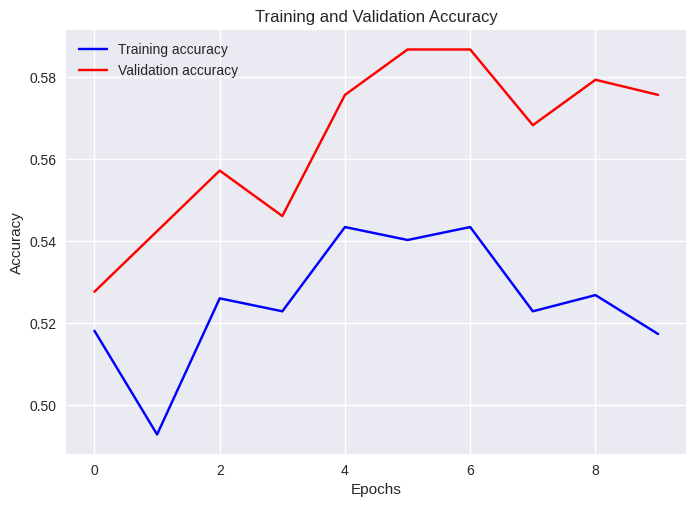


======= Lap 5 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69264, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7306 - accuracy: 0.5190 - val_loss: 0.6926 - val_accuracy: 0.5387 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69264 to 0.68477, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7307 - accuracy: 0.4968 - val_loss: 0.6848 - val_accuracy: 0.5498 - 543ms/epoch - 14ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68477 to 0.68188, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7106 - accuracy: 0.5253 - val_loss: 0.6819 - val_accuracy: 0.5683 - 416ms/epoch - 10ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68188
40/40 - 0s - loss: 0.7046 - accuracy: 0.5261 - val_loss: 0.6825 - val_accuracy: 0.5683 - 488ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68188 to 0.68172, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.6971

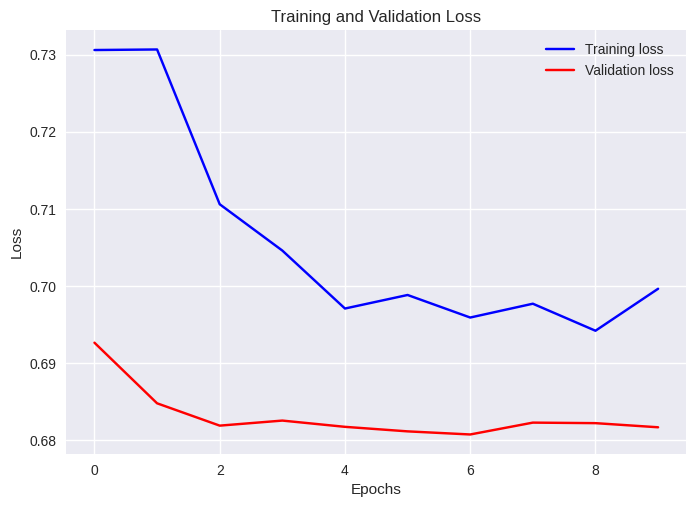

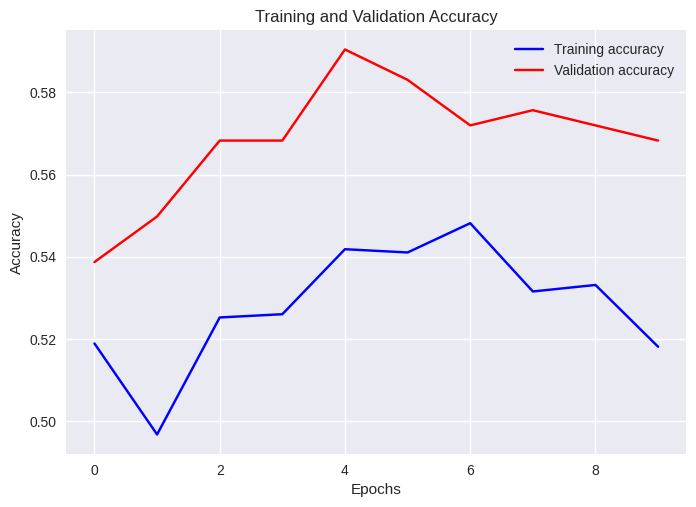


======= Lap 6 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69261, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7306 - accuracy: 0.5174 - val_loss: 0.6926 - val_accuracy: 0.5314 - 2s/epoch - 41ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69261 to 0.68486, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7305 - accuracy: 0.4945 - val_loss: 0.6849 - val_accuracy: 0.5498 - 595ms/epoch - 15ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68486 to 0.68170, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7102 - accuracy: 0.5213 - val_loss: 0.6817 - val_accuracy: 0.5572 - 542ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68170
40/40 - 1s - loss: 0.7050 - accuracy: 0.5245 - val_loss: 0.6829 - val_accuracy: 0.5609 - 512ms/epoch - 13ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68170 to 0.68131, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.6964

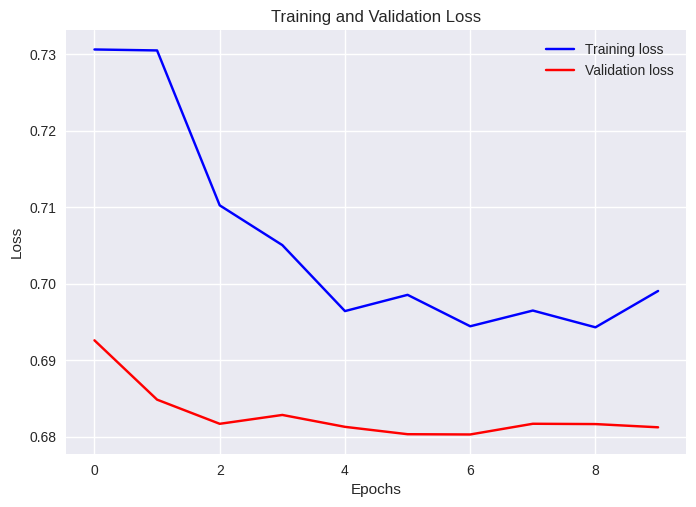

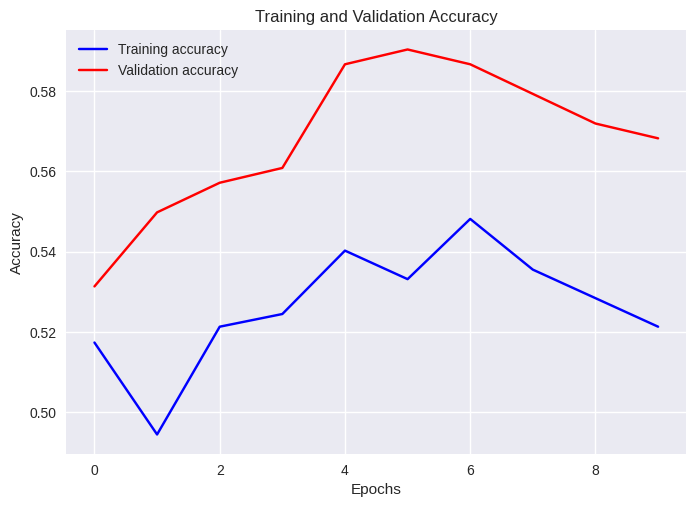


======= Lap 7 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69253, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7305 - accuracy: 0.5174 - val_loss: 0.6925 - val_accuracy: 0.5277 - 2s/epoch - 41ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69253 to 0.68497, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7301 - accuracy: 0.4992 - val_loss: 0.6850 - val_accuracy: 0.5498 - 502ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68497 to 0.68134, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7106 - accuracy: 0.5253 - val_loss: 0.6813 - val_accuracy: 0.5609 - 512ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68134
40/40 - 0s - loss: 0.7045 - accuracy: 0.5308 - val_loss: 0.6824 - val_accuracy: 0.5756 - 456ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68134
40/40 - 0s - loss: 0.6965 - accuracy: 0.5466 - val_loss: 0.6814 - 

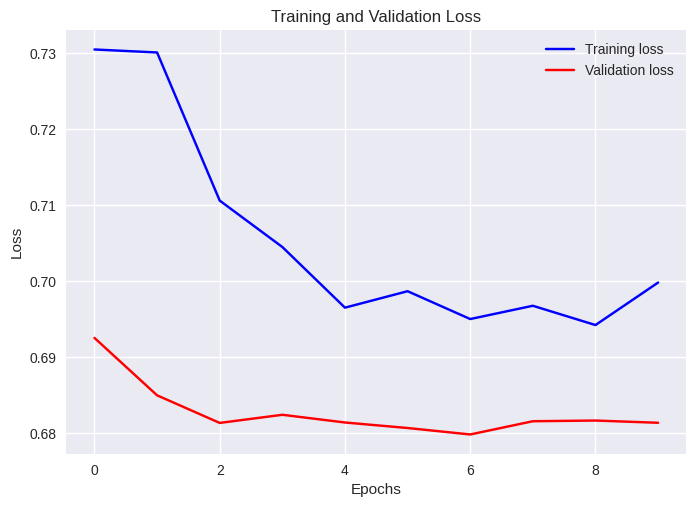

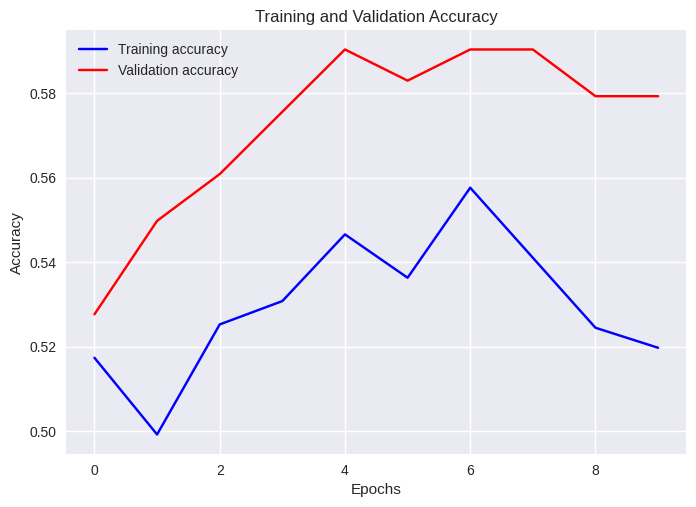


======= Lap 8 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69235, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7305 - accuracy: 0.5190 - val_loss: 0.6923 - val_accuracy: 0.5351 - 2s/epoch - 49ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69235 to 0.68454, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7303 - accuracy: 0.4968 - val_loss: 0.6845 - val_accuracy: 0.5424 - 478ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68454 to 0.68117, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7102 - accuracy: 0.5284 - val_loss: 0.6812 - val_accuracy: 0.5683 - 553ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68117
40/40 - 0s - loss: 0.7036 - accuracy: 0.5237 - val_loss: 0.6822 - val_accuracy: 0.5646 - 437ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68117
40/40 - 0s - loss: 0.6958 - accuracy: 0.5450 - val_loss: 0.6813 - 

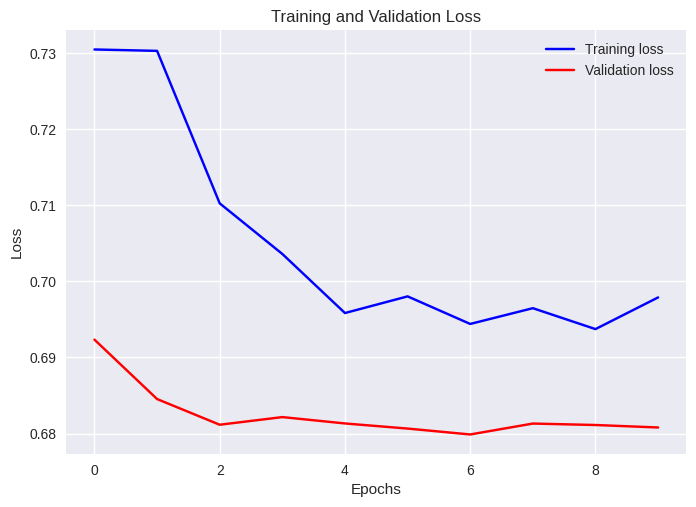

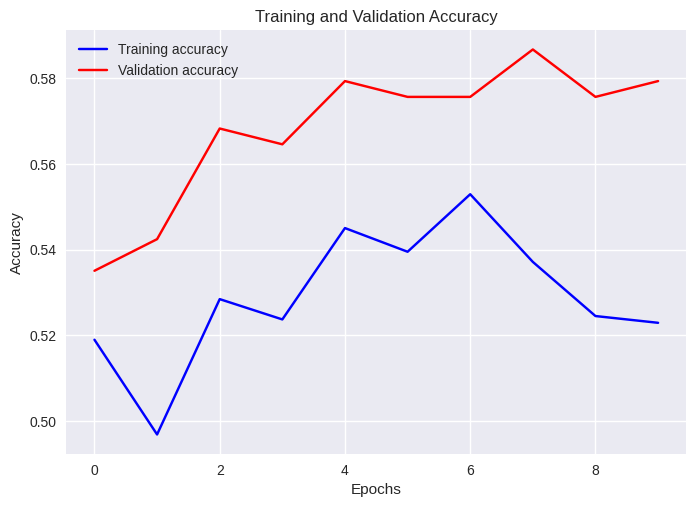


======= Lap 9 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69210, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5182 - val_loss: 0.6921 - val_accuracy: 0.5387 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69210 to 0.68431, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7299 - accuracy: 0.4961 - val_loss: 0.6843 - val_accuracy: 0.5535 - 479ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68431 to 0.68121, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7094 - accuracy: 0.5300 - val_loss: 0.6812 - val_accuracy: 0.5683 - 413ms/epoch - 10ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68121
40/40 - 0s - loss: 0.7040 - accuracy: 0.5284 - val_loss: 0.6822 - val_accuracy: 0.5793 - 432ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68121 to 0.68080, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.6960

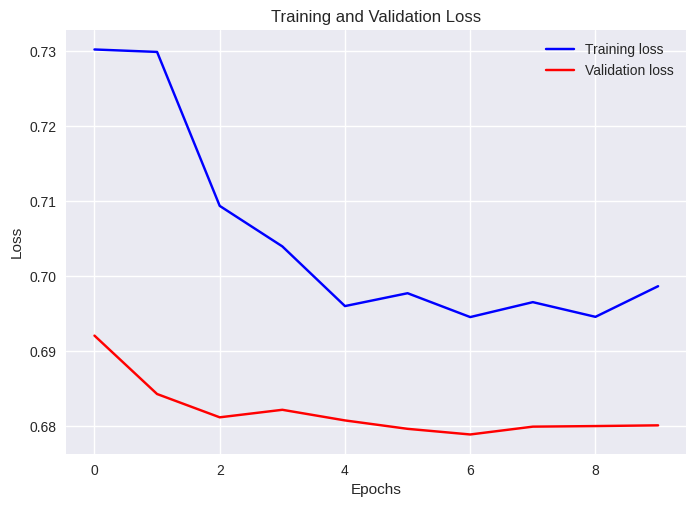

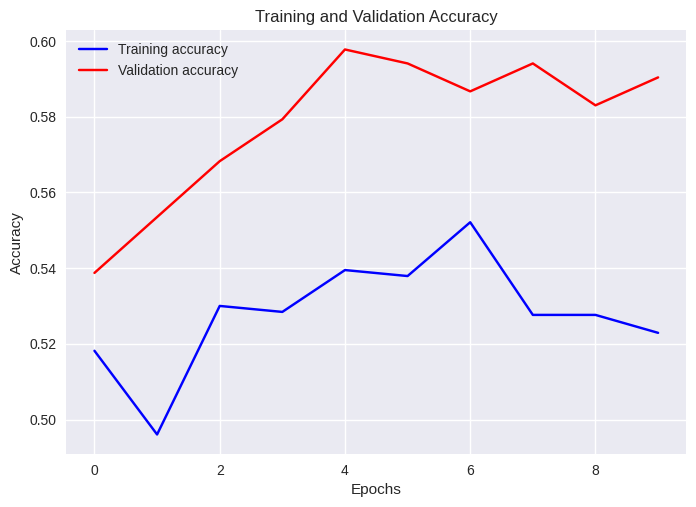


======= Lap 10 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69247, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6925 - val_accuracy: 0.5351 - 2s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69247 to 0.68461, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7301 - accuracy: 0.5008 - val_loss: 0.6846 - val_accuracy: 0.5535 - 502ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68461 to 0.68118, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5190 - val_loss: 0.6812 - val_accuracy: 0.5646 - 448ms/epoch - 11ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68118
40/40 - 0s - loss: 0.7041 - accuracy: 0.5316 - val_loss: 0.6825 - val_accuracy: 0.5720 - 439ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68118
40/40 - 0s - loss: 0.6963 - accuracy: 0.5419 - val_loss: 0.6813 -

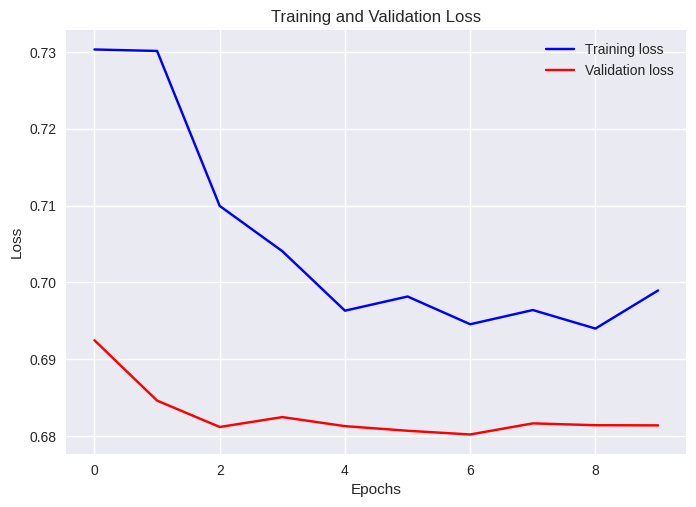

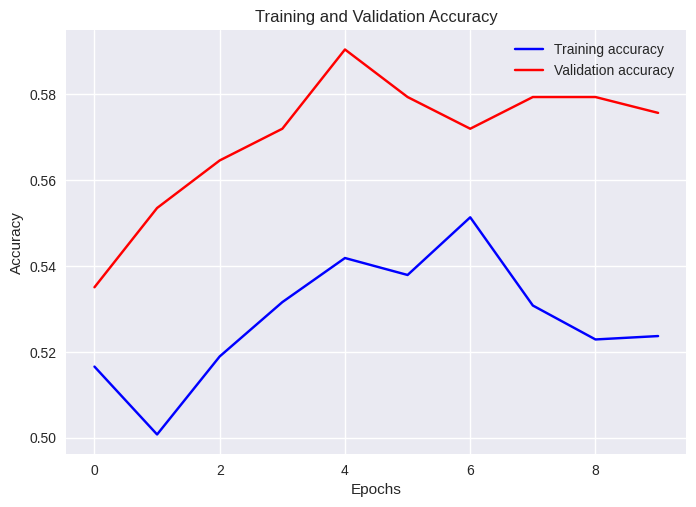


======= Lap 11 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69214, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5174 - val_loss: 0.6921 - val_accuracy: 0.5351 - 2s/epoch - 45ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69214 to 0.68401, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7297 - accuracy: 0.4992 - val_loss: 0.6840 - val_accuracy: 0.5572 - 571ms/epoch - 14ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68401 to 0.68105, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7097 - accuracy: 0.5253 - val_loss: 0.6811 - val_accuracy: 0.5572 - 435ms/epoch - 11ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68105
40/40 - 0s - loss: 0.7039 - accuracy: 0.5237 - val_loss: 0.6820 - val_accuracy: 0.5720 - 370ms/epoch - 9ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68105 to 0.68078, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.6955

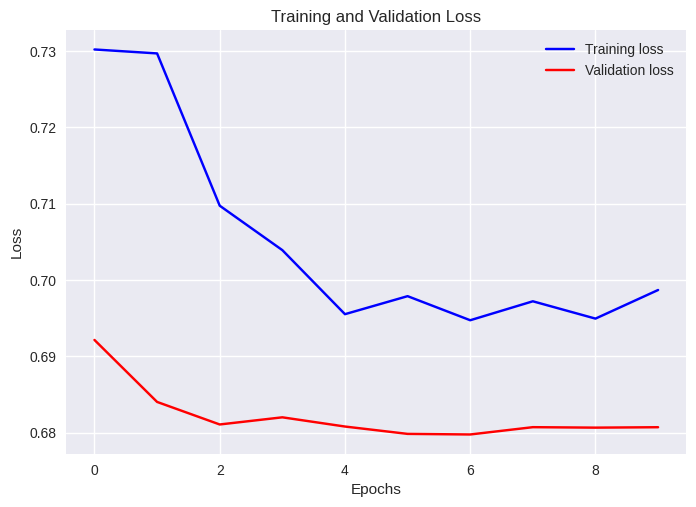

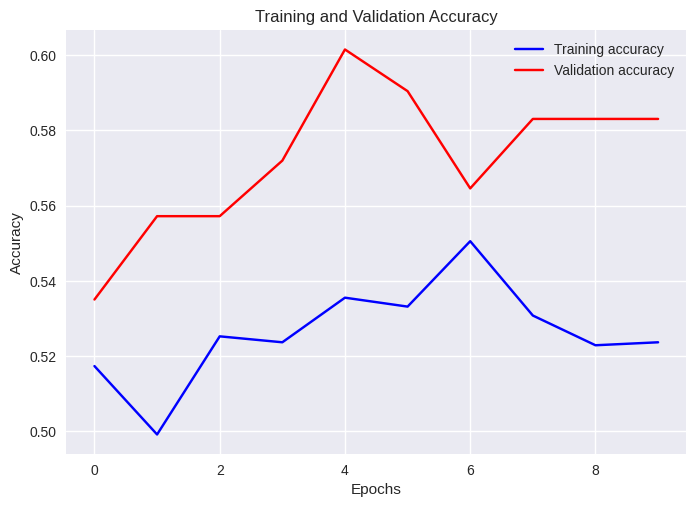


======= Lap 12 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69238, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5174 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 45ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69238 to 0.68437, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7294 - accuracy: 0.4984 - val_loss: 0.6844 - val_accuracy: 0.5461 - 402ms/epoch - 10ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68437 to 0.68097, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7099 - accuracy: 0.5245 - val_loss: 0.6810 - val_accuracy: 0.5646 - 433ms/epoch - 11ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68097
40/40 - 0s - loss: 0.7040 - accuracy: 0.5292 - val_loss: 0.6825 - val_accuracy: 0.5756 - 453ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68097
40/40 - 0s - loss: 0.6960 - accuracy: 0.5379 - val_loss: 0.6813 -

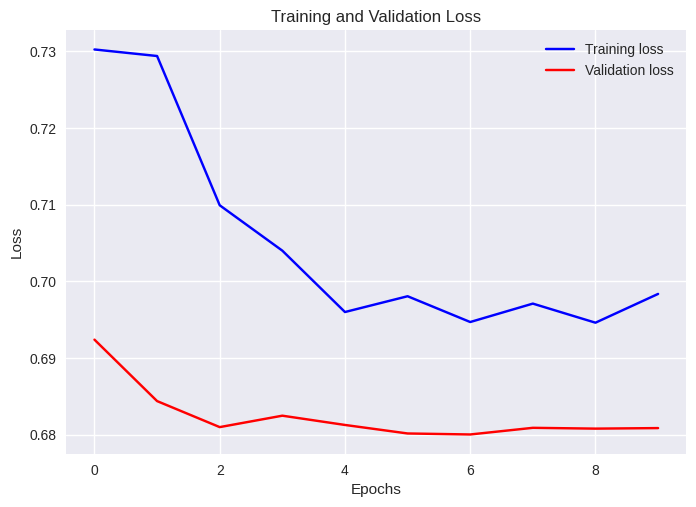

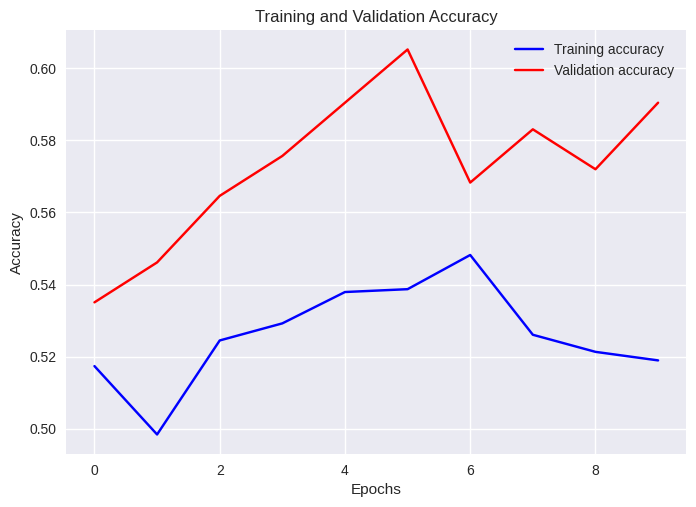


======= Lap 13 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69251, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5166 - val_loss: 0.6925 - val_accuracy: 0.5351 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69251 to 0.68417, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7296 - accuracy: 0.5000 - val_loss: 0.6842 - val_accuracy: 0.5572 - 482ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68417 to 0.68130, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7095 - accuracy: 0.5261 - val_loss: 0.6813 - val_accuracy: 0.5756 - 417ms/epoch - 10ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68130
40/40 - 0s - loss: 0.7044 - accuracy: 0.5276 - val_loss: 0.6824 - val_accuracy: 0.5830 - 434ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68130 to 0.68126, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.696

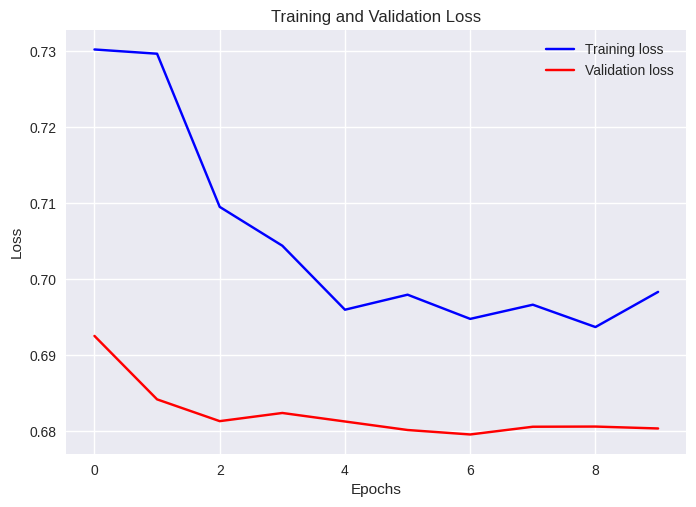

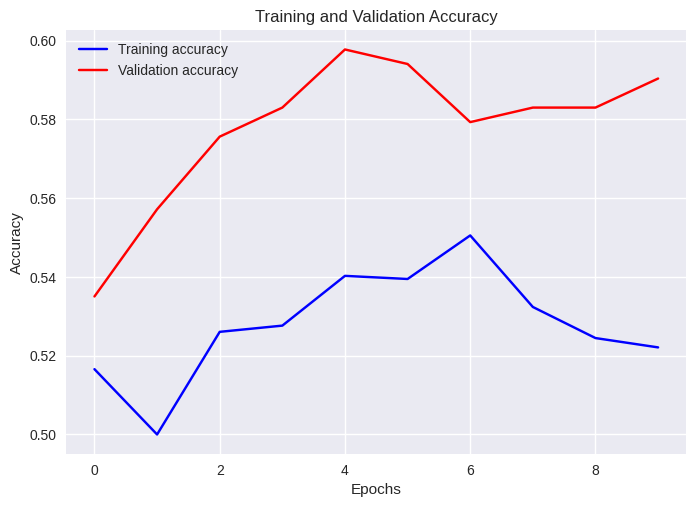


======= Lap 14 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69261, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5166 - val_loss: 0.6926 - val_accuracy: 0.5351 - 2s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69261 to 0.68409, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.4992 - val_loss: 0.6841 - val_accuracy: 0.5646 - 506ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68409 to 0.68148, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7093 - accuracy: 0.5276 - val_loss: 0.6815 - val_accuracy: 0.5646 - 405ms/epoch - 10ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68148
40/40 - 0s - loss: 0.7041 - accuracy: 0.5213 - val_loss: 0.6825 - val_accuracy: 0.5756 - 364ms/epoch - 9ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68148 to 0.68110, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.6954

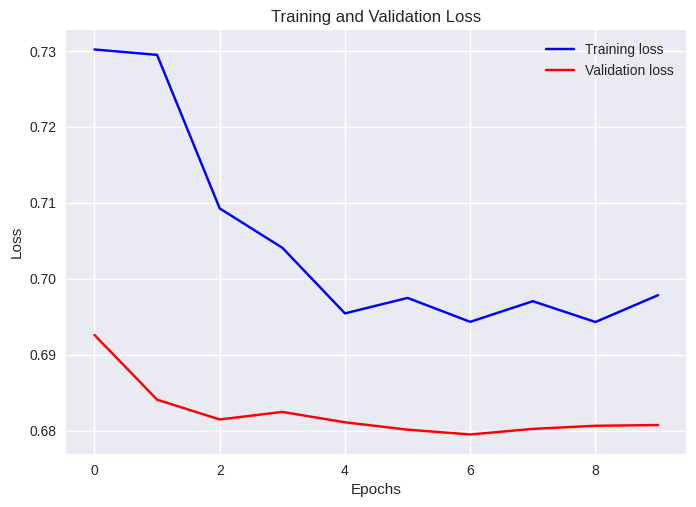

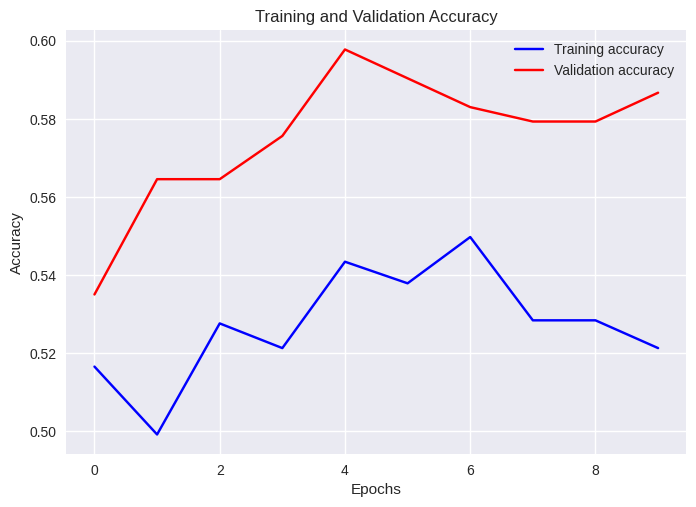


======= Lap 15 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69250, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5158 - val_loss: 0.6925 - val_accuracy: 0.5351 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69250 to 0.68422, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7295 - accuracy: 0.5000 - val_loss: 0.6842 - val_accuracy: 0.5572 - 463ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68422 to 0.68097, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7098 - accuracy: 0.5245 - val_loss: 0.6810 - val_accuracy: 0.5609 - 517ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68097
40/40 - 0s - loss: 0.7040 - accuracy: 0.5284 - val_loss: 0.6824 - val_accuracy: 0.5756 - 487ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68097
40/40 - 0s - loss: 0.6958 - accuracy: 0.5466 - val_loss: 0.6812 -

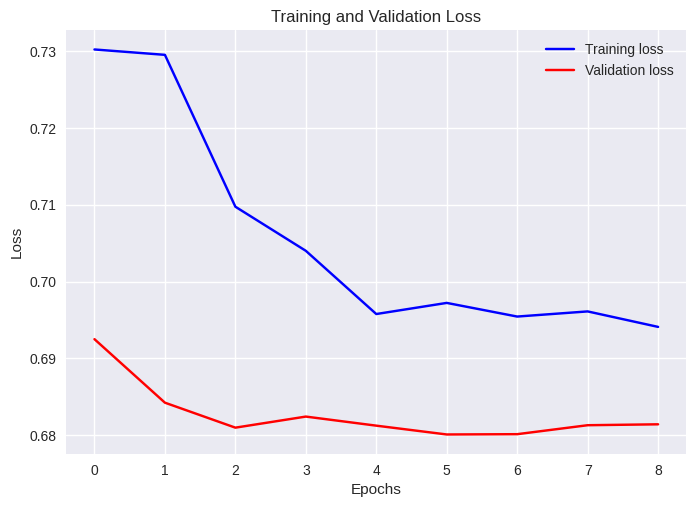

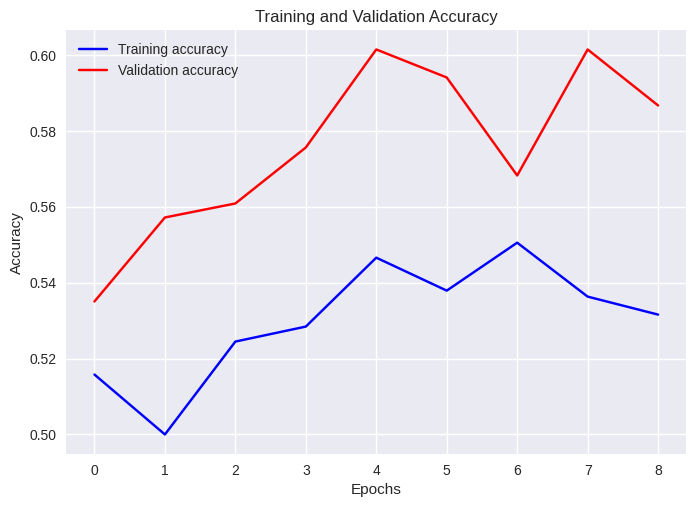


======= Lap 16 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69235, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5158 - val_loss: 0.6923 - val_accuracy: 0.5351 - 2s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69235 to 0.68394, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7296 - accuracy: 0.5024 - val_loss: 0.6839 - val_accuracy: 0.5572 - 519ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68394 to 0.68115, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7098 - accuracy: 0.5269 - val_loss: 0.6812 - val_accuracy: 0.5646 - 506ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68115
40/40 - 0s - loss: 0.7039 - accuracy: 0.5292 - val_loss: 0.6823 - val_accuracy: 0.5756 - 379ms/epoch - 9ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68115 to 0.68102, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.6956

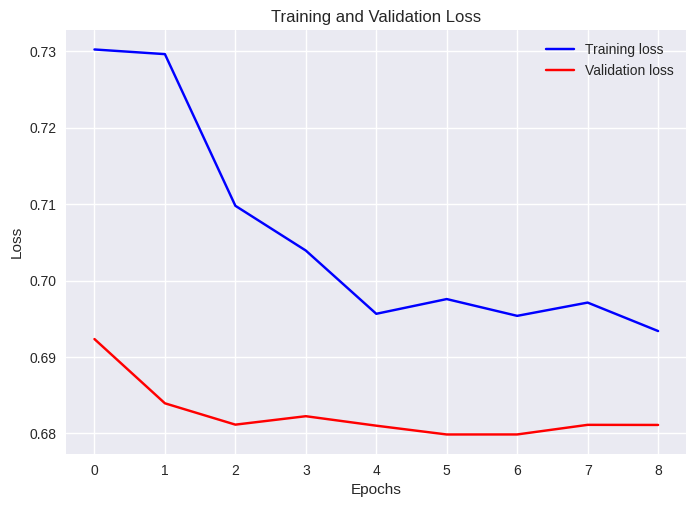

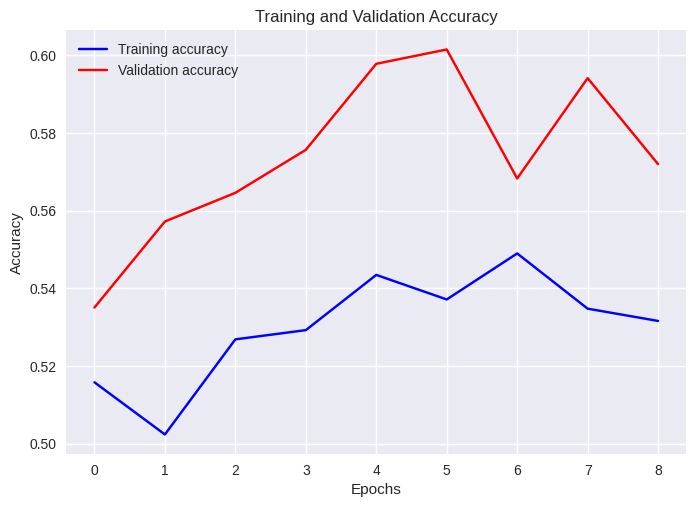


======= Lap 17 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69233, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7302 - accuracy: 0.5158 - val_loss: 0.6923 - val_accuracy: 0.5351 - 2s/epoch - 49ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69233 to 0.68380, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5000 - val_loss: 0.6838 - val_accuracy: 0.5535 - 500ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68380 to 0.68068, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7098 - accuracy: 0.5213 - val_loss: 0.6807 - val_accuracy: 0.5720 - 487ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68068
40/40 - 0s - loss: 0.7040 - accuracy: 0.5276 - val_loss: 0.6817 - val_accuracy: 0.5720 - 441ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68068
40/40 - 1s - loss: 0.6958 - accuracy: 0.5371 - val_loss: 0.6809 -

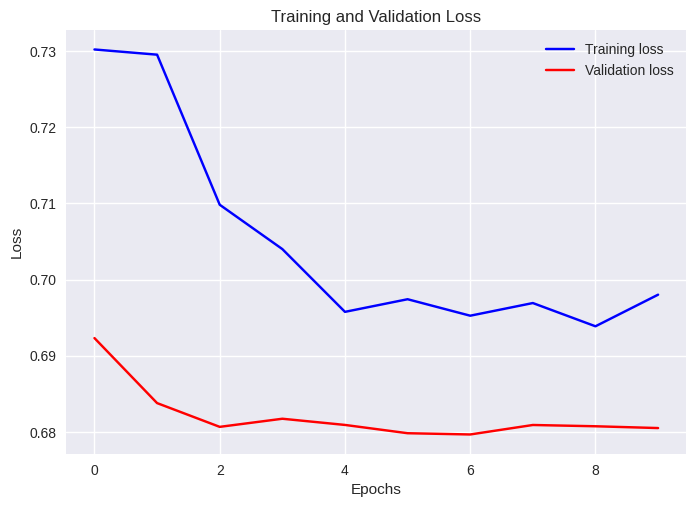

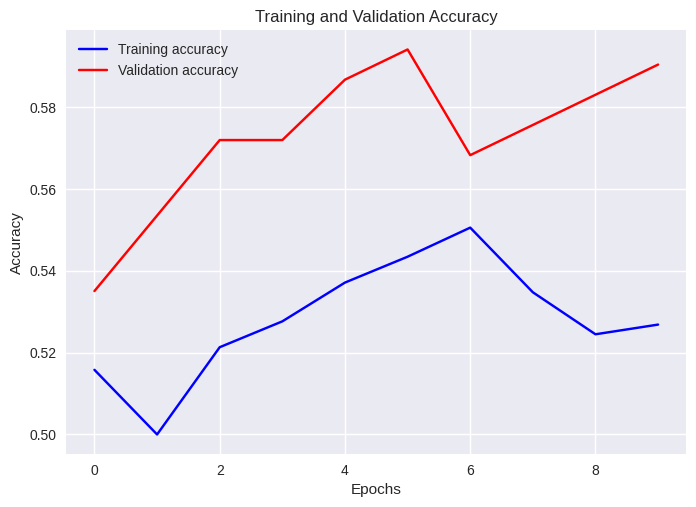


======= Lap 18 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69245, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5158 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69245 to 0.68401, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7297 - accuracy: 0.5016 - val_loss: 0.6840 - val_accuracy: 0.5609 - 602ms/epoch - 15ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68401 to 0.68078, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7096 - accuracy: 0.5229 - val_loss: 0.6808 - val_accuracy: 0.5756 - 465ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68078
40/40 - 0s - loss: 0.7038 - accuracy: 0.5261 - val_loss: 0.6821 - val_accuracy: 0.5830 - 397ms/epoch - 10ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68078 to 0.68077, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.695

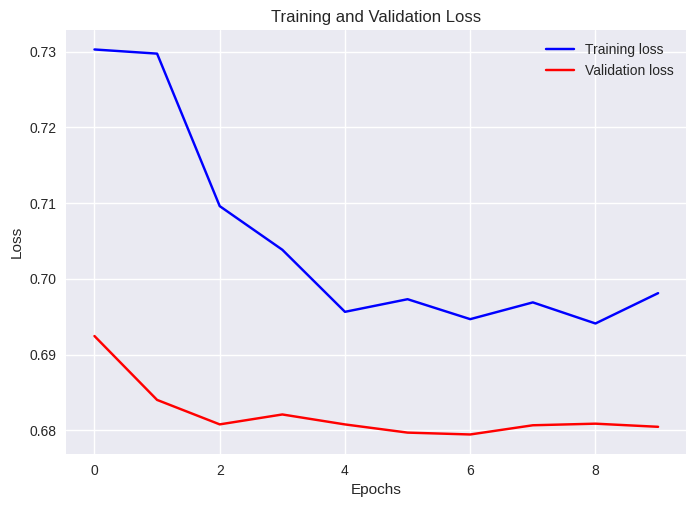

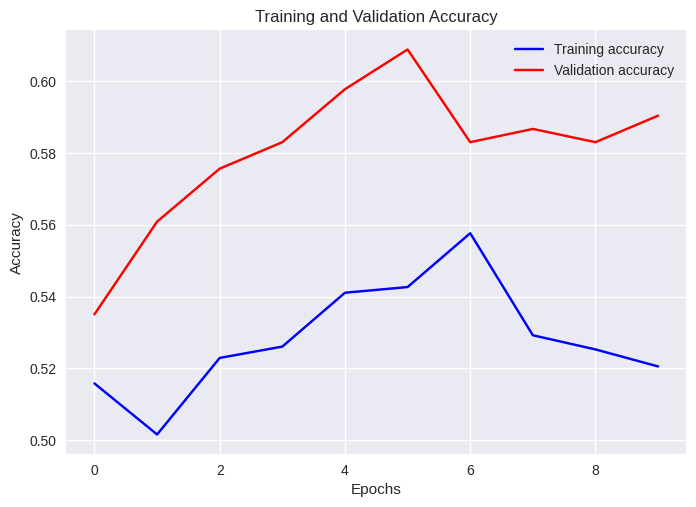


======= Lap 19 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69236, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5158 - val_loss: 0.6924 - val_accuracy: 0.5387 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69236 to 0.68375, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7298 - accuracy: 0.4976 - val_loss: 0.6838 - val_accuracy: 0.5609 - 530ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68375 to 0.68076, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7096 - accuracy: 0.5261 - val_loss: 0.6808 - val_accuracy: 0.5572 - 452ms/epoch - 11ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68076
40/40 - 0s - loss: 0.7041 - accuracy: 0.5269 - val_loss: 0.6821 - val_accuracy: 0.5793 - 437ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68076 to 0.68076, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.695

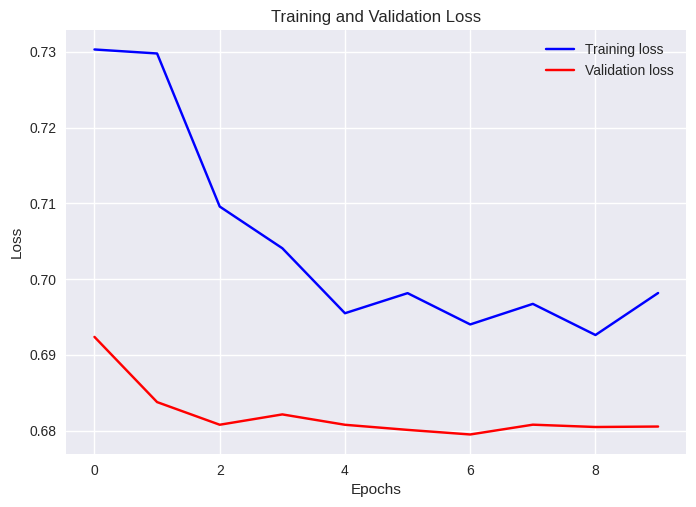

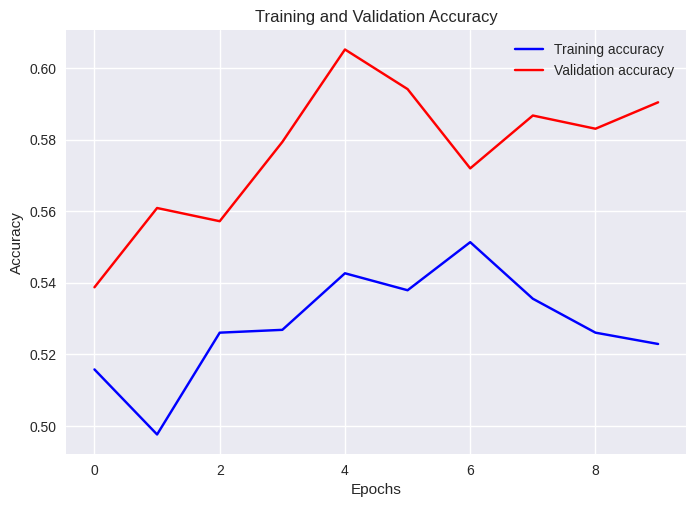


======= Lap 20 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69236, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5158 - val_loss: 0.6924 - val_accuracy: 0.5387 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69236 to 0.68375, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7298 - accuracy: 0.4976 - val_loss: 0.6838 - val_accuracy: 0.5609 - 599ms/epoch - 15ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68375 to 0.68074, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7096 - accuracy: 0.5261 - val_loss: 0.6807 - val_accuracy: 0.5572 - 554ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68074
40/40 - 0s - loss: 0.7040 - accuracy: 0.5276 - val_loss: 0.6820 - val_accuracy: 0.5756 - 445ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68074 to 0.68069, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.695

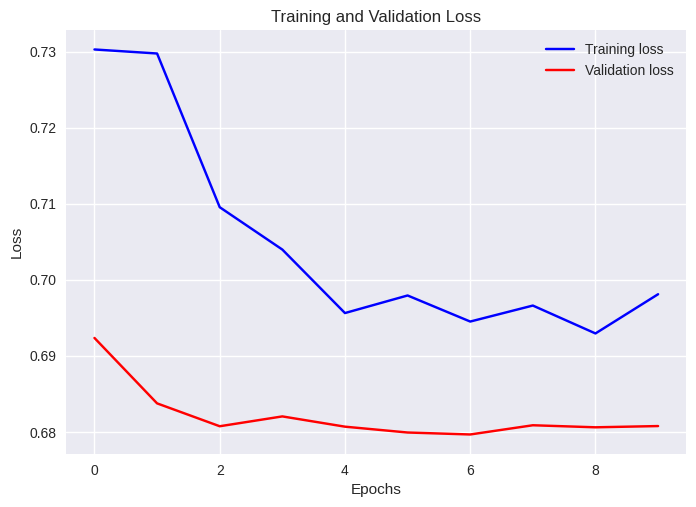

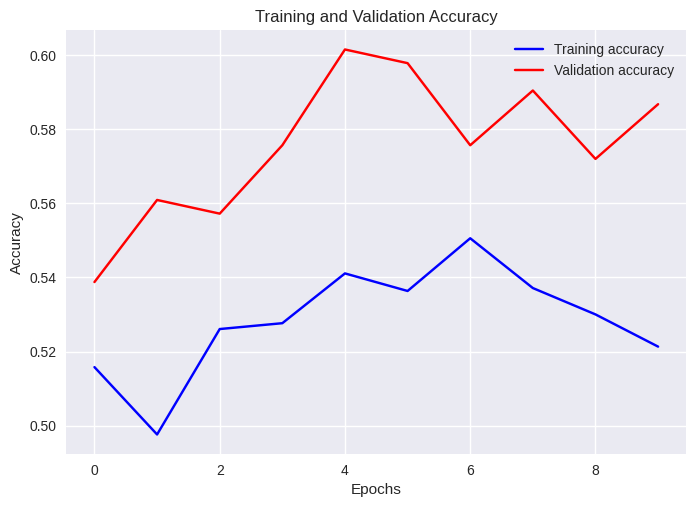


======= Lap 21 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 43ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68408, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 522ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68408 to 0.68110, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7101 - accuracy: 0.5237 - val_loss: 0.6811 - val_accuracy: 0.5720 - 528ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68110
40/40 - 0s - loss: 0.7043 - accuracy: 0.5261 - val_loss: 0.6821 - val_accuracy: 0.5867 - 458ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68110
40/40 - 0s - loss: 0.6960 - accuracy: 0.5403 - val_loss: 0.6813 -

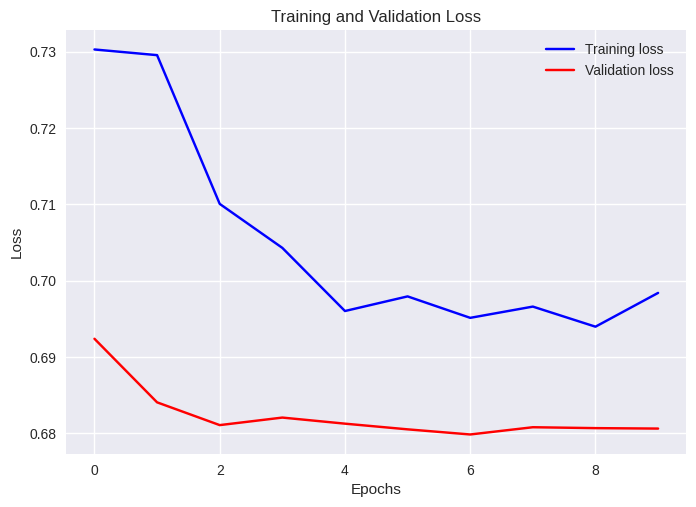

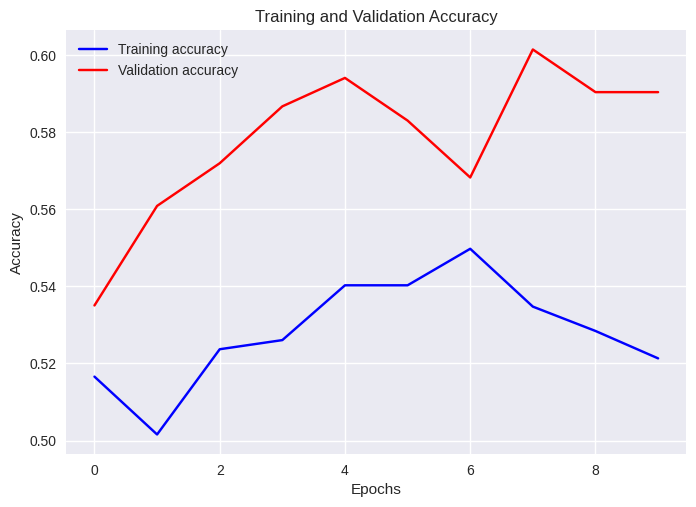


======= Lap 22 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 41ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68413, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 552ms/epoch - 14ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68413 to 0.68118, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7101 - accuracy: 0.5261 - val_loss: 0.6812 - val_accuracy: 0.5683 - 513ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68118
40/40 - 0s - loss: 0.7041 - accuracy: 0.5269 - val_loss: 0.6821 - val_accuracy: 0.5793 - 464ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.68118 to 0.68117, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.695

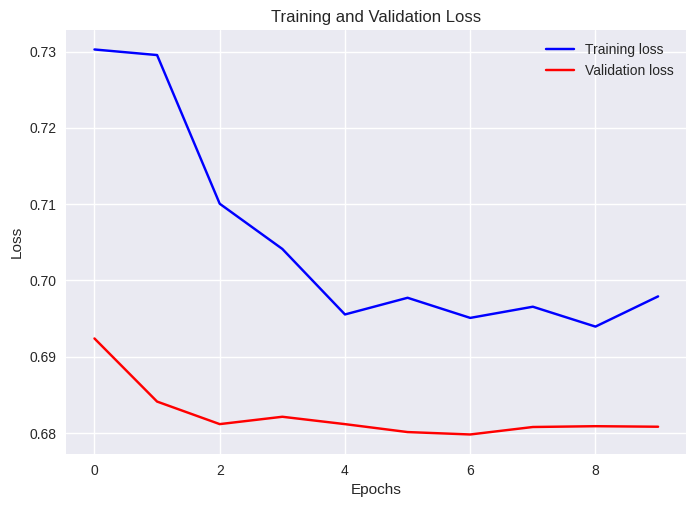

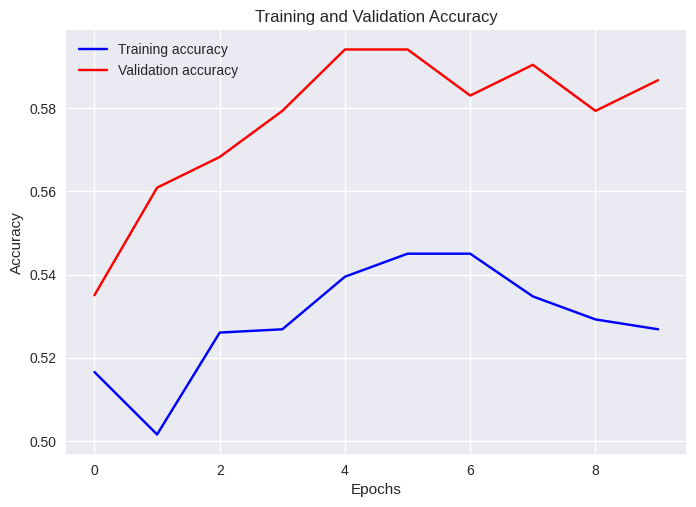


======= Lap 23 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 42ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6842 - val_accuracy: 0.5609 - 490ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68136, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6814 - val_accuracy: 0.5572 - 488ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68136
40/40 - 1s - loss: 0.7042 - accuracy: 0.5276 - val_loss: 0.6827 - val_accuracy: 0.5793 - 526ms/epoch - 13ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68136
40/40 - 0s - loss: 0.6959 - accuracy: 0.5395 - val_loss: 0.6814 -

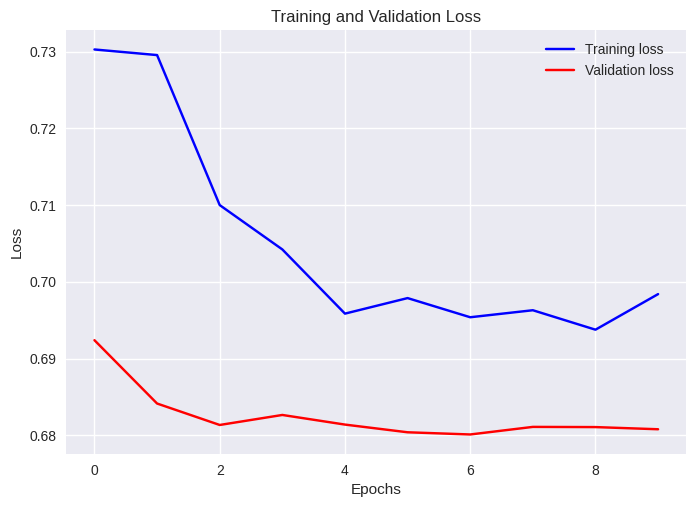

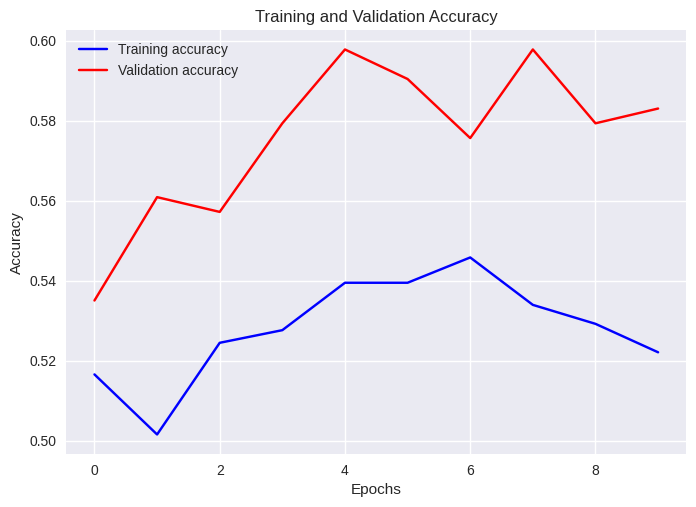


======= Lap 24 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 623ms/epoch - 16ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 555ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 493ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.6956 - accuracy: 0.5411 - val_loss: 0.6815 -

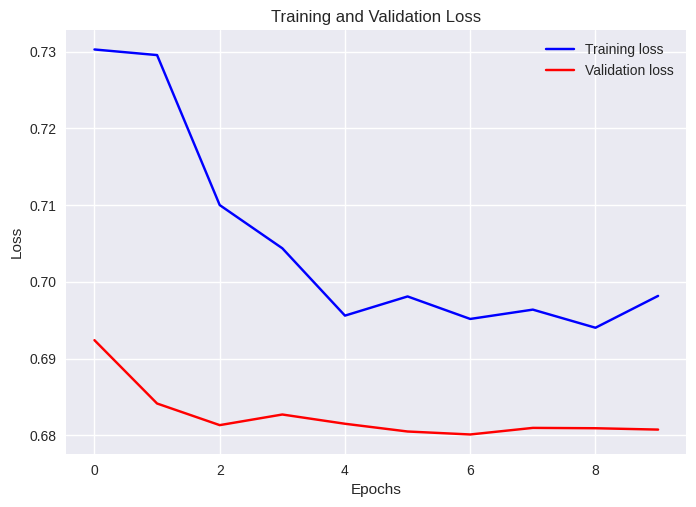

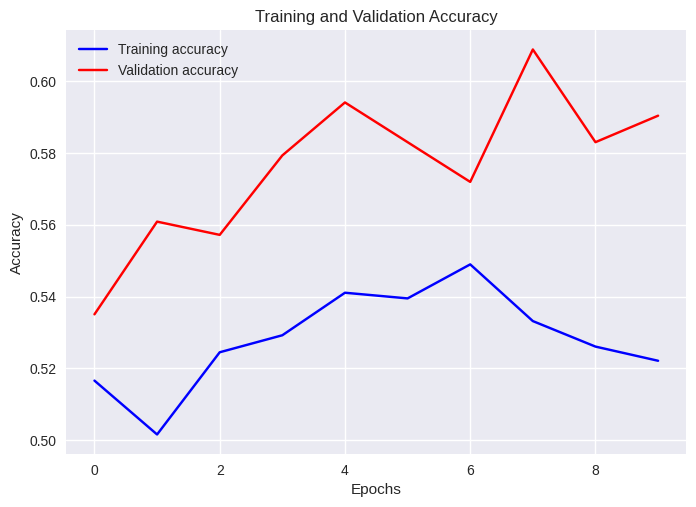


======= Lap 25 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 506ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 474ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 405ms/epoch - 10ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 -

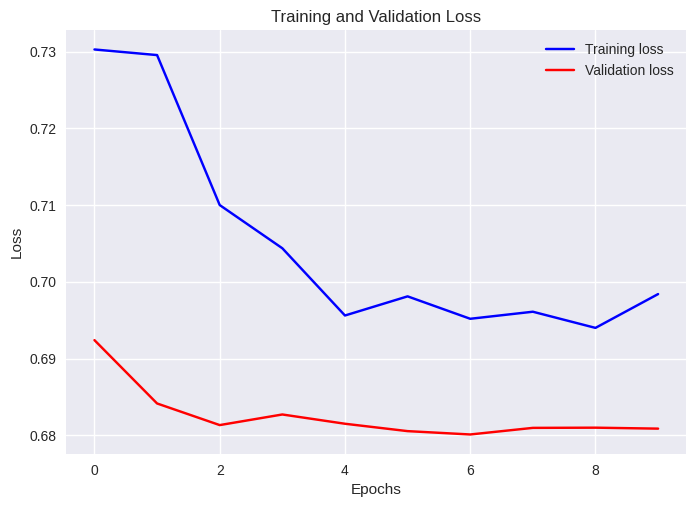

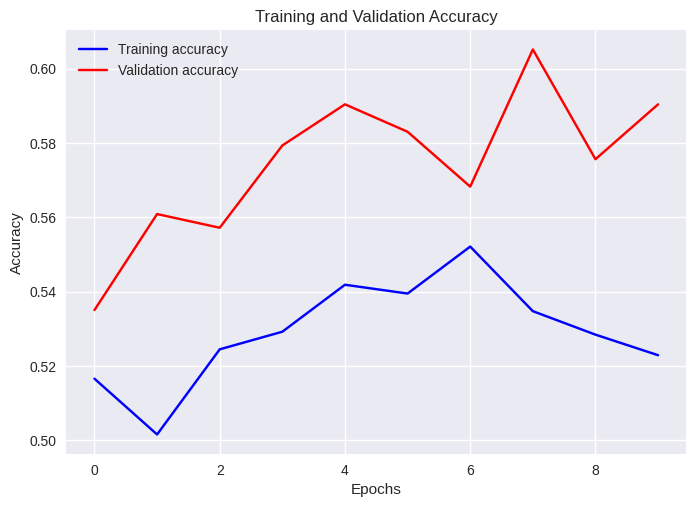


======= Lap 26 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 568ms/epoch - 14ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 485ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 497ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 -

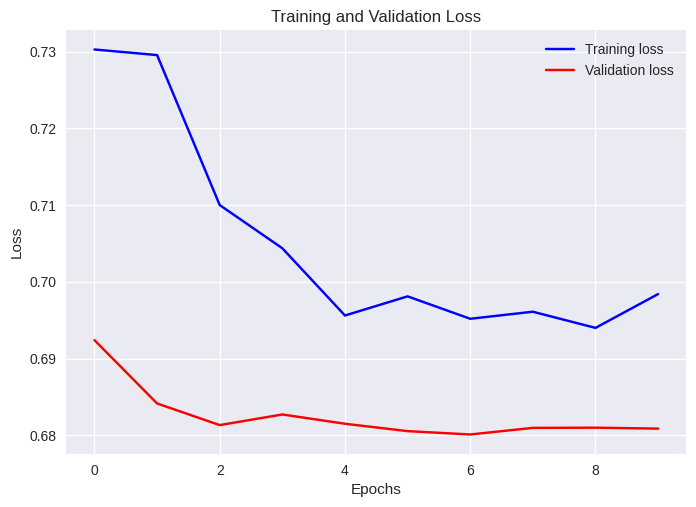

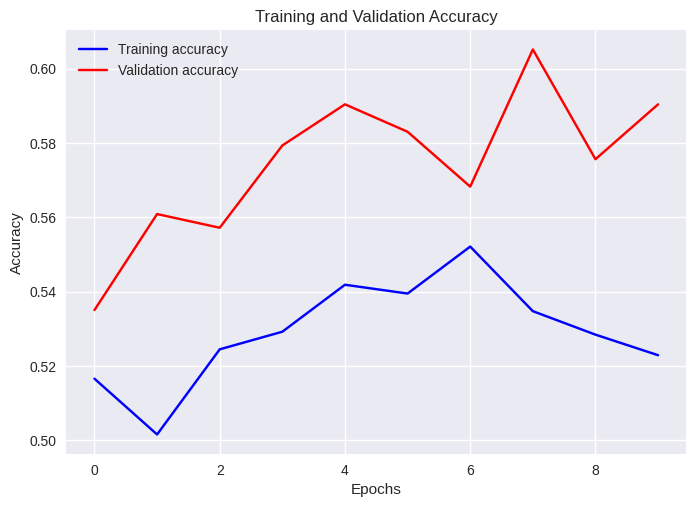


======= Lap 27 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 46ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 526ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 579ms/epoch - 14ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 419ms/epoch - 10ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 1s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 -

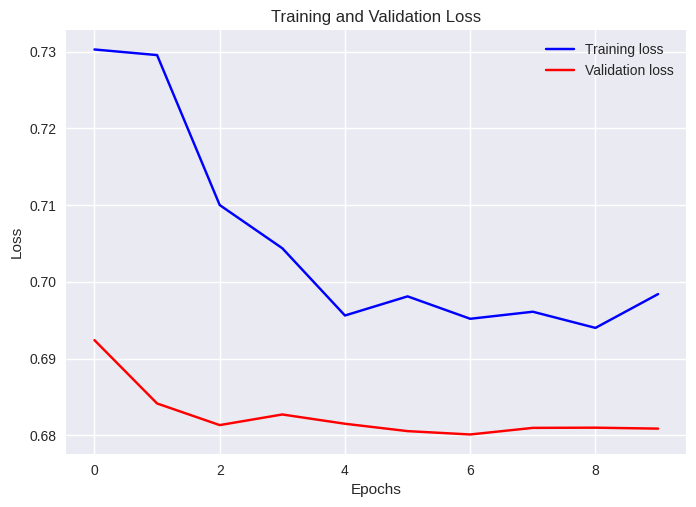

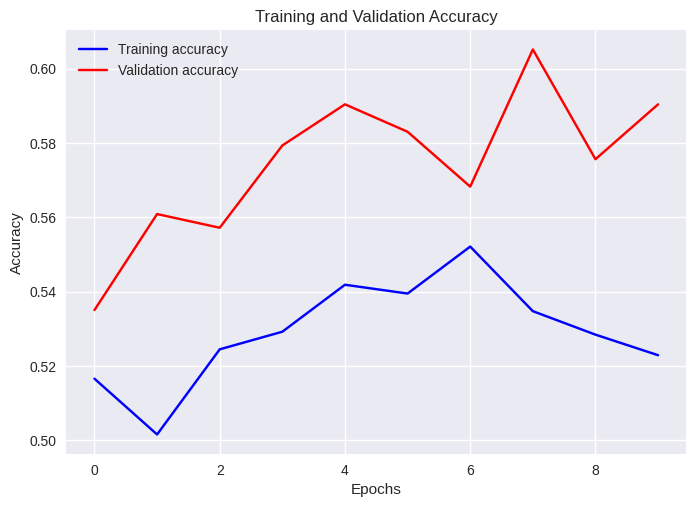


======= Lap 28 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 45ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 493ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 489ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 1s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 516ms/epoch - 13ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 -

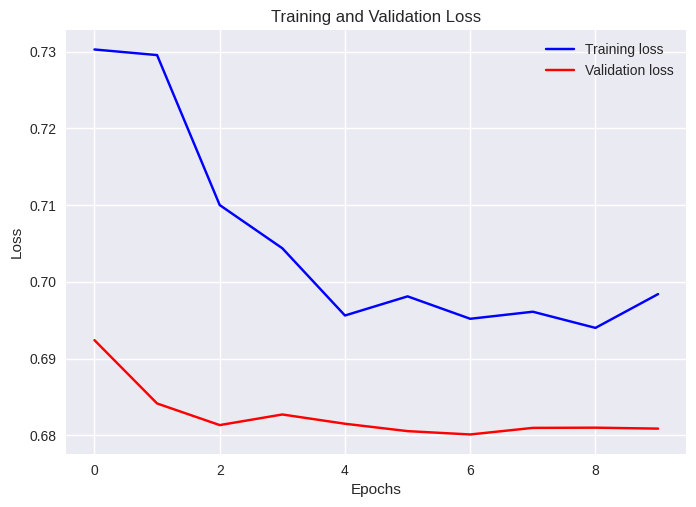

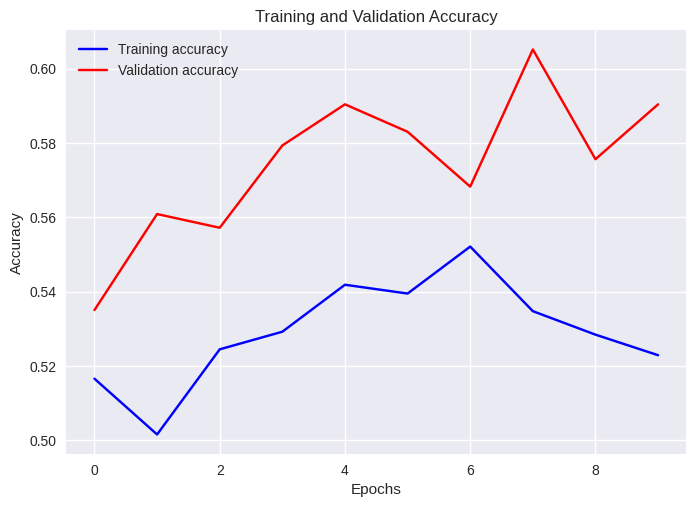


======= Lap 29 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 2s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 2s/epoch - 44ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 538ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 509ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 499ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 1s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 -

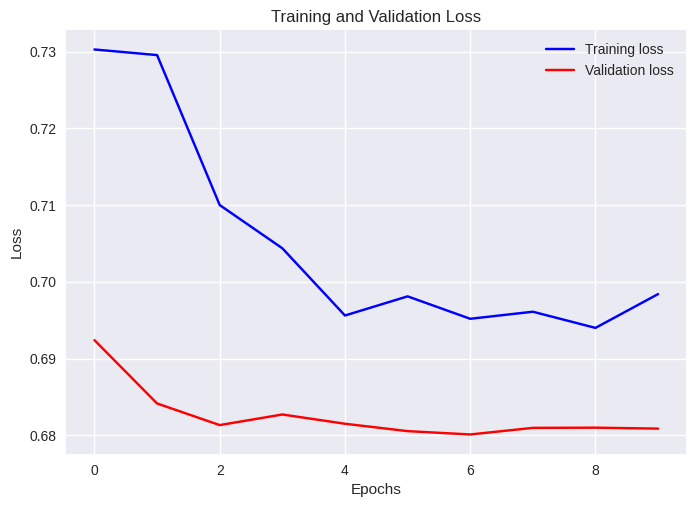

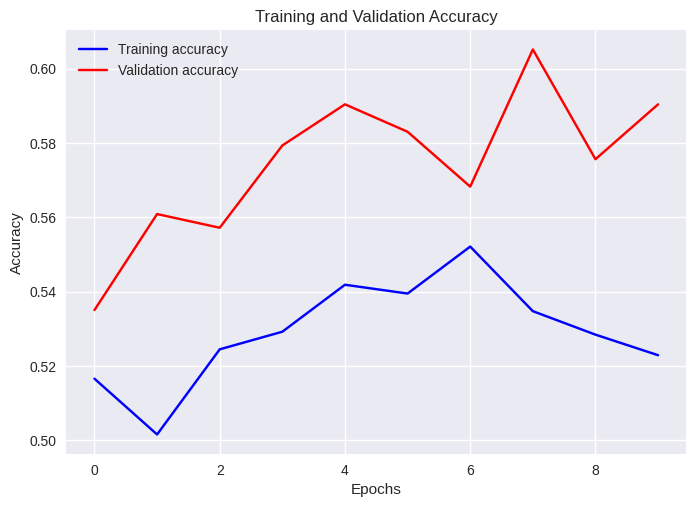


======= Lap 30 =======
Train = 1266, Val = 271, Test = 272, All = 1809
Epoch 1/50

Epoch 1: val_loss improved from inf to 0.69240, saving model to model_checkpoint.h5
40/40 - 3s - loss: 0.7303 - accuracy: 0.5166 - val_loss: 0.6924 - val_accuracy: 0.5351 - 3s/epoch - 63ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.69240 to 0.68415, saving model to model_checkpoint.h5
40/40 - 1s - loss: 0.7295 - accuracy: 0.5016 - val_loss: 0.6841 - val_accuracy: 0.5609 - 584ms/epoch - 15ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.68415 to 0.68133, saving model to model_checkpoint.h5
40/40 - 0s - loss: 0.7100 - accuracy: 0.5245 - val_loss: 0.6813 - val_accuracy: 0.5572 - 379ms/epoch - 9ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.7044 - accuracy: 0.5292 - val_loss: 0.6827 - val_accuracy: 0.5793 - 409ms/epoch - 10ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68133
40/40 - 0s - loss: 0.6956 - accuracy: 0.5419 - val_loss: 0.6815 - 

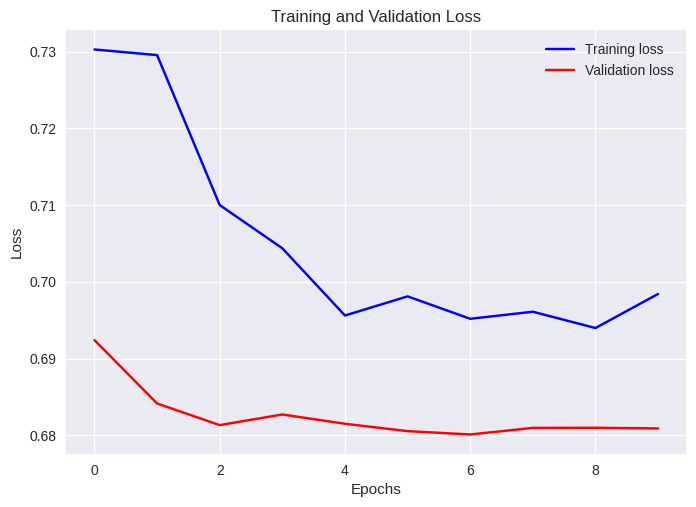

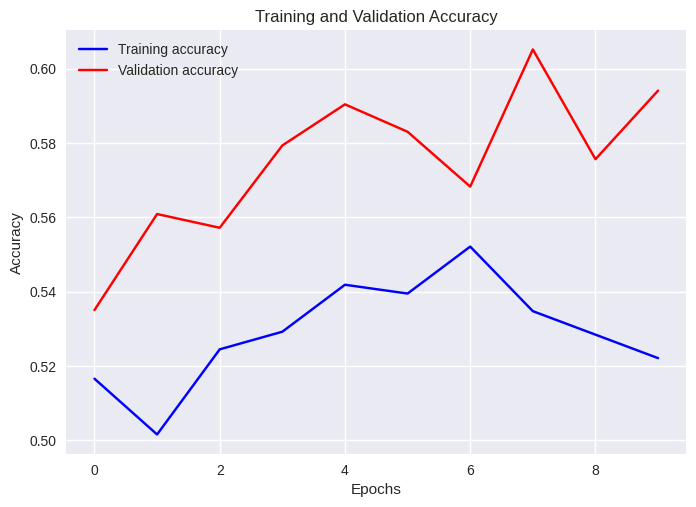


Accuracy mean: 0.7410680472591229, std: 0.06004209362134411
Coverage mean: 0.08137254901960787, std: 0.005674429854308935


In [3]:
acc_list = []
cov_list = []
laps = 30

for i in range (0,laps):
    print("\n======= Lap {} =======".format(i+1))
    model = DNNModel(neg_cutoff=0.42,pos_cutoff=0.58,epochs=50,train_size=0.7,val_size=0.15)
    model.configure(hl=2, hu = 100, dropout=True, input_dim=len(fm.cols))
    model.prepare_data(data = fm.df,cols = fm.cols)
    accurracy, coverage = model.run()
    model.visualize_loss()
    model.visualize_accuracy()
    acc_list.append(accurracy)
    cov_list.append(coverage)
acc_arr = np.array(acc_list)
cov_arr = np.array(cov_list)
print("\n======")
print("Accuracy mean: {}, std: {}".format(acc_arr.mean(),acc_arr.std()))
print("Coverage mean: {}, std: {}".format(cov_arr.mean(),cov_arr.std()))
print("======")

In [5]:
from turtle import color
import matplotlib.pyplot as plt

def visualize_result():
    laps = range(len(acc_list))
    plt.figure()
    plt.plot(laps, acc_list, "b", label="Accuracy")
    plt.plot(laps, cov_list, "r", label="Coverage")
    plt.title("Accuracy and Coverage")
    plt.xlabel("Test Lap")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

def scatter_result():
    plt.figure(figsize=(6,6))
    plt.scatter(acc_list, cov_list, s=80, c="b", alpha=0.5)
    plt.scatter(sum(acc_list)/len(acc_list),sum(cov_list)/len(cov_list), s=100, c="r")
    plt.title("Accurracy and Coverage")
    plt.xlabel("Accuracy")
    plt.ylabel("Coverage")
    plt.show()


In [ ]:
len(acc_list)

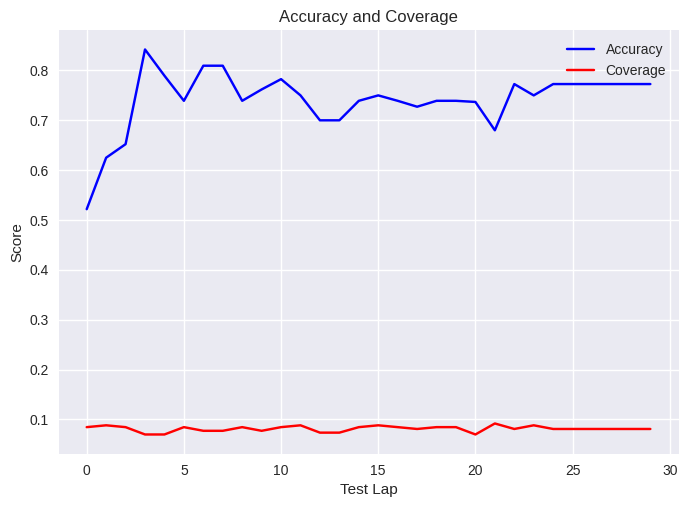

In [6]:
visualize_result()

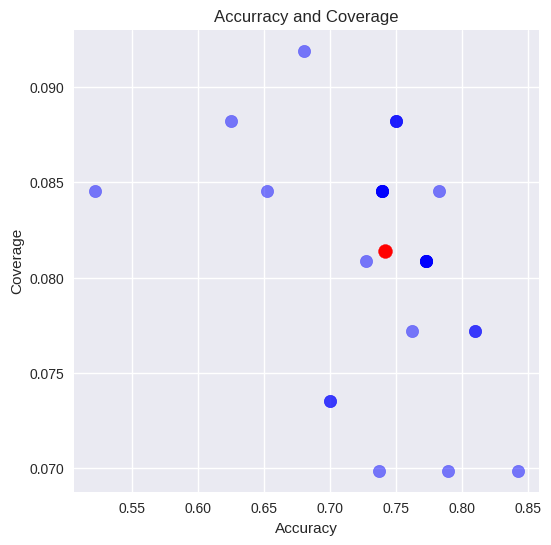

In [7]:
scatter_result()